# Testing individual functions

## Test converting image color space

In [ ]:
import scg_detection_tools.utils.image_tools as imtools

IMG = "/home/juliocesar/leaf-detection/imgs/light_group/images/5_640x640_sparse_png.rf.8487b4dcf757592bdee225c7d4132935.jpg"
imtools.plot_image(IMG, cvt_to_rgb=False)
for cspace in imtools.COLOR_SPACES_CV2:
    print(cspace, flush=True)
    cvt = imtools.convert(IMG, cspace)
    imtools.plot_image(cvt, cvt_to_rgb=False)

# Free use cells

[2024-11-27 09:09:16] INFO - build_sam.py - Loaded checkpoint sucessfully



image 1/1 /home/juliocesar/leaf-detection/scg-detection-tools/notebooks/.temp/d5376626c41858c4d12313d8425ef686f1df24c7e1b55e46.png: 640x640 300 leafs, 25.8ms
Speed: 1.9ms preprocess, 25.8ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/juliocesar/leaf-detection/scg-detection-tools/notebooks/.temp/cf71d4e689613ebc7e9087583aa335c3925ce624375eb472.png: 640x352 236 leafs, 36.5ms
Speed: 1.2ms preprocess, 36.5ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 352)

image 1/1 /home/juliocesar/leaf-detection/scg-detection-tools/notebooks/.temp/55d1f5ba0681c95d57d0938888ea4d9145d1f4a99bde2afb.png: 352x640 275 leafs, 35.1ms
Speed: 1.1ms preprocess, 35.1ms inference, 0.3ms postprocess per image at shape (1, 3, 352, 640)

image 1/1 /home/juliocesar/leaf-detection/scg-detection-tools/notebooks/.temp/1ea4ac9a0cbeab143d4ff35027dd00f36e82a1ccb98b4197.png: 640x640 138 leafs, 26.2ms
Speed: 1.7ms preprocess, 26.2ms inference, 0.3ms postprocess per image at

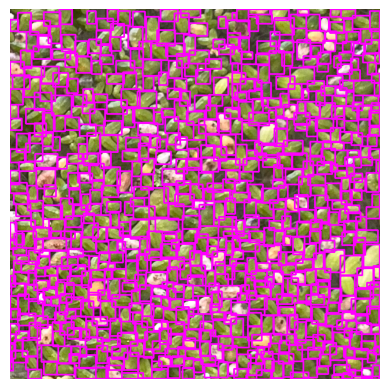

[2024-11-27 09:09:16] INFO - sam2_image_predictor.py - For numpy array image, we assume (HxWxC) format
[2024-11-27 09:09:16] INFO - sam2_image_predictor.py - Computing image embeddings for the provided image...
[2024-11-27 09:09:16] INFO - sam2_image_predictor.py - Image embeddings computed.


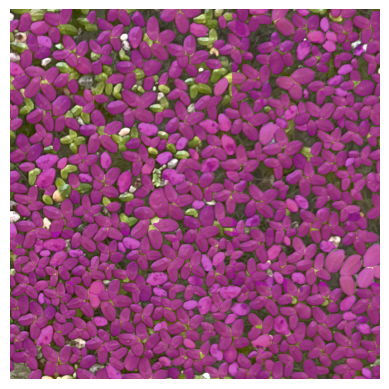

In [10]:
# Generate box-only and mask-only images
from scg_detection_tools.detect import Detector
from scg_detection_tools.segment import SAM2Segment
from scg_detection_tools.models import YOLOv8
import scg_detection_tools.utils.image_tools as imtools
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = "/home/juliocesar/leaf-detection/imgs/analysis_test/4_640x640_full.png"
det = Detector(detection_model=YOLOv8("/home/juliocesar/leaf-detection/checkpoints/yolov10/large/train8/best.pt"))
det.update_parameters(slice_detect=True, slice_wh=(480,480), slice_fill=False)
seg = SAM2Segment(
    sam2_ckpt_path="/home/juliocesar/leaf-detection/checkpoints/sam2/sam2_hiera_tiny.pt",
    sam2_cfg="sam2_hiera_t.yaml",
)

dets = det(img)[0]
boxed = imtools.box_annotated_image(img, dets, box_thickness=2)
boxed = cv2.cvtColor(boxed, cv2.COLOR_BGR2RGB)
plt.imshow(boxed)
plt.axis('off')
plt.show()

masks = seg.segment_detection(img, dets)
masked = cv2.imread(img)
masked = cv2.cvtColor(masked, cv2.COLOR_BGR2RGB)
for mask in masks:
    h, w = mask.shape[-2:]
    mask = mask.reshape(h,w,1).astype(np.uint8)
    masked = imtools.apply_image_mask(masked, mask)
plt.imshow(masked)
plt.axis("off")
plt.show()

def gen_box_mask_only(img: str, detections, masks):
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    black = np.zeros_like(img)
    boxed = imtools.box_annotated_image(black, detections, box_thickness=2)
    masked = black.copy()
    for mask in masks:
        h,w = mask.shape[-2:]
        mask = mask.reshape(h,w,1).astype(np.uint8)
        masked = imtools.apply_image_mask(masked, mask, color=[1.0,1.0,1.0], alpha=1)

    return boxed,masked
